# EXPLORATORY DATA ANALYSIS - SP500 COMPANIES & STOCK DATA
### Contexto e Objetivo

Este projeto tem como objetivo uma Análise Exploratória de Dados (EDA) do conjunto de dados das empresas que compõem o índice S&P 500, um dos principais indicadores do mercado financeiro dos Estados Unidos. O índice S&P 500 é composto pelas 500 maiores empresas, listadas principalmente nas bolsas NYSE e NASDAQ, abrangendo varios setores e indústrias.

##### A análise se baseia em dois conjuntos de dados principais:
* **Empresas do S&P 500:** Contendo informações sobre a bolsa onde estão listadas, dados financeiros (como valor de mercado e crescimento da receita), setor, indústria e localização geográfica.
* **Ações das Empresas do S&P 500:** Complementando com dados históricos das ações, como preços diários de abertura e fechamento, volume negociado e variação de preços.


Com esta análise, busquei entender as características principais dessas empresas, explorar os padrões financeiros e de mercado, além de identificar possíveis insights úteis para analistas, investidores ou para estudos econômicos.  Esta análise tentará responder perguntas como:

- Qual é a distribuição dos setores e indústrias no índice S&P 500?
- Quais são as empresas com maior valor de mercado?
- Qual é a distribuição geográfica dessas empresas?
- Como os preços das ações variam ao longo do tempo?

### Conjunto de Dados

Os conjuntos de dados foram retirados do Kaggle, disponível em [S&P 500 Stocks (daily updated)](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks). Eles contêm os seguintes campos:

##### **1. Empresas do S&P 500** 

* **exchange:** Bolsa de valores onde a ação da empresa está listada (Ex.: "NMS" para NASDAQ).
* **symbol:** Símbolo usado para identificar a ação.
* **shortname:** Nome abreviado da empresa.
* **longname:** Nome completo da empresa.
* **sector:** Setor onde a empresa atua (Ex.: "Technology", "Communication Services").
* **industry:** Indústria específica dentro de um setor onde a empresa atua (e.g., "Consumer Electronics", "Semiconductors").
* **currentprice:** Preço atual das ações.
* **marketcap:** Valor de mercado da empresa em dólares, representando o valor total de suas ações.
* **ebitda:** Lucros antes de juros, impostos, depreciação e amortização (EBITDA) em dólares.
* **revenuegrowth:** Taxa de crescimento da receita da empresa.
* **city:** Cidade onde a sede da empresa está localizada (cidade matriz).
* **state:** Estado onde a empresa está localizada.
* **country:** País onde a empresa está localizada.
* **fulltimeemployees:** Número de funcionários em tempo integral.
* **longbusinesssummary:** Resumo da empresa. 

##### **2. Dados Históricos das Ações do S&P 500** 
* **date:** Data da transação.
* **symbol:** Símbolo/ticker da ação para identificar a empresa.
* **adj_close:** Preço ajustado de fechamento da ação (considerando dividendos e splits).
* **close:** Preço de fechamento da ação no dia.
* **high:** Preço máximo da ação no período.
* **low:** Preço mínimo no período.
* **open:** Preço de abertura no mercado.
* **volume:** Volume total de ações negociadas no período.


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from IPython.display import display

In [104]:
df_companies= pd.read_csv('database/sp500_companies.csv')
df_companies.columns = df_companies.columns.str.lower().str.replace(' ', '_')

df_companies.head()

,exchange,symbol,shortname,longname,sector,industry,currentprice,marketcap,ebitda,revenuegrowth,city,state,country,fulltimeemployees,longbusinesssummary,weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,228.20,3469575716864,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.065263
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,435.27,3235379150848,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.060858
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,116.00,2845480058880,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.053524
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,163.59,2019943776256,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037996
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,164.64,2019326164992,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037984


In [105]:
df_companies.info()
df_companies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   exchange             503 non-null    object 
 1   symbol               503 non-null    object 
 2   shortname            503 non-null    object 
 3   longname             503 non-null    object 
 4   sector               503 non-null    object 
 5   industry             503 non-null    object 
 6   currentprice         503 non-null    float64
 7   marketcap            503 non-null    int64  
 8   ebitda               474 non-null    float64
 9   revenuegrowth        501 non-null    float64
 10  city                 503 non-null    object 
 11  state                483 non-null    object 
 12  country              503 non-null    object 
 13  fulltimeemployees    499 non-null    float64
 14  longbusinesssummary  503 non-null    object 
 15  weight               503 non-null    flo

,currentprice,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight
count,503.000000,5.030000e+02,4.740000e+02,501.000000,4.990000e+02,503.000000
mean,221.323072,1.056912e+11,6.805585e+09,0.058778,5.802898e+04,0.001988
std,509.696808,3.090187e+11,1.485991e+10,0.142305,1.389014e+05,0.005813
min,8.240000,6.415600e+09,-4.107000e+09,-0.573000,2.800000e+01,0.000121
25%,69.895000,1.998471e+10,1.585225e+09,-0.001000,1.018550e+04,0.000376
50%,125.090000,3.706336e+10,2.880500e+09,0.048000,2.124900e+04,0.000697
75%,238.135000,7.919065e+10,5.896271e+09,0.098000,5.496600e+04,0.001490
max,9473.010000,3.469576e+12,1.317810e+11,1.430000,2.100000e+06,0.065263


In [106]:
df_companies.isnull().sum()
# df.duplicated().sum()

exchange                0
symbol                  0
shortname               0
longname                0
sector                  0
industry                0
currentprice            0
marketcap               0
ebitda                 29
revenuegrowth           2
city                    0
state                  20
country                 0
fulltimeemployees       4
longbusinesssummary     0
weight                  0
dtype: int64

In [107]:
# Exibir todas as linhas onde há pelo menos um valor ausente independente da coluna
# missing_data = df[df.isnull().any(axis=1)]

# Coluna específica
# missing_data = df[df['revenuegrowth'].isnull()]
# print(missing_data)

# Quantidade de empresas e ações distintas
print(df_companies['shortname'].nunique())
print(df_companies['symbol'].nunique())

# Empresas com mais de uma ações listada
acoes_por_empresa = df_companies.groupby('shortname').size()
empresas_varias_acoes = acoes_por_empresa[acoes_por_empresa > 1].index
print(empresas_varias_acoes)

resultado = df_companies[df_companies['shortname'].isin(empresas_varias_acoes)][['shortname', 'symbol', 'exchange']]
print(resultado)


500
503
Index(['Alphabet Inc.', 'Fox Corporation', 'News Corporation'], dtype='object', name='shortname')
            shortname symbol exchange
3       Alphabet Inc.  GOOGL      NMS
4       Alphabet Inc.   GOOG      NMS
397   Fox Corporation    FOX      NMS
398   Fox Corporation   FOXA      NMS
433  News Corporation   NWSA      NMS
434  News Corporation    NWS      NMS


## Análise Exploratória de Dados (COMPANIES)

### 1. Distribuição de Empresas por Bolsa de Valores (Exchange)

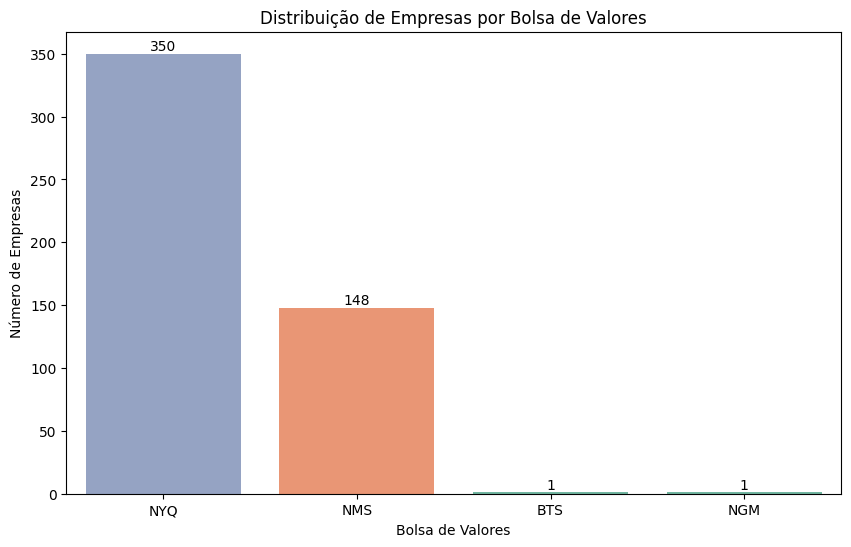

In [108]:
# Filtrar empresas únicas
df_companies_unique = df_companies.drop_duplicates(subset='shortname')

companies_by_exchange = df_companies_unique['exchange'].value_counts()

# print(companies_by_exchange)

plt.figure(figsize=(10, 6))

axes = sns.barplot(x=companies_by_exchange.index, y=companies_by_exchange.values, palette='Set2', hue=companies_by_exchange, legend=False)

plt.title('Distribuição de Empresas por Bolsa de Valores')
plt.xlabel('Bolsa de Valores')
plt.ylabel('Número de Empresas')

for i in axes.patches:
    axes.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),  ha='center', va='bottom')

plt.show()

* NYQ (NYSE) domina com 350 empresas, seguido por NMS (NASDAQ) com 148 empresas.
* Apenas 2 empresas estão listadas em exchanges menores: BTS e NGM (1 empresa cada).

* **Principal Insight:** O mercado é altamente concentrado nessas duas grandes bolsas de valores, NYSE e NASDAQ, que representam quase a totalidade das empresas analisadas, destacando a relevância dessas duas bolsas nos EUA.

### 2. Distribuição de Setores e Indústrias

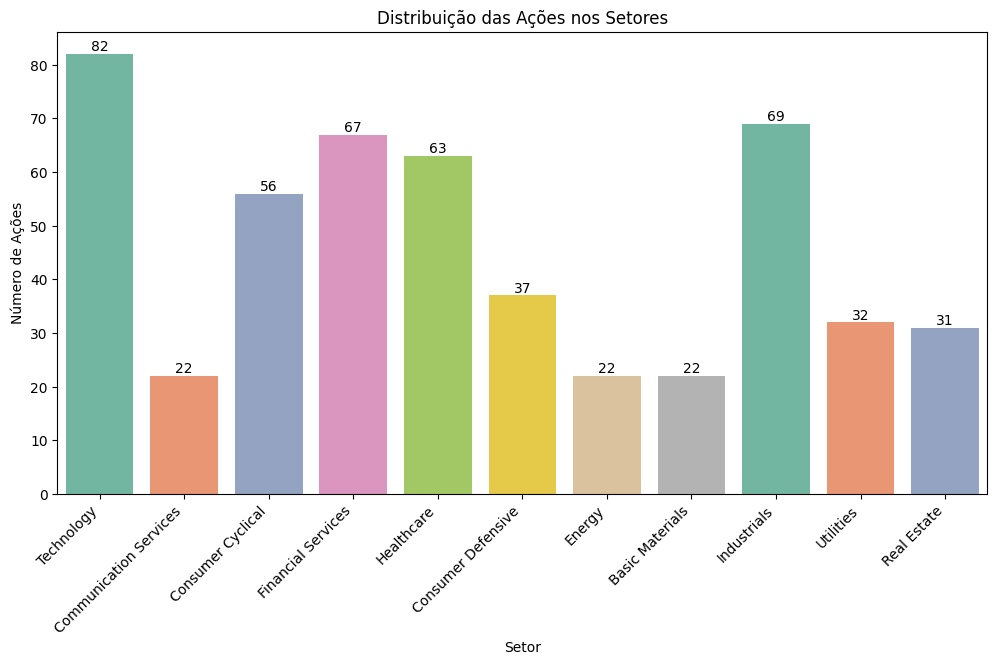

In [109]:
# print(df.groupby('sector').size())
# print(len(df))

plt.figure(figsize=(12, 6))

axes = sns.countplot(x='sector', data=df_companies, hue='sector', palette='Set2', legend=False)

plt.title('Distribuição das Ações nos Setores')
plt.xlabel('Setor')
plt.ylabel('Número de Ações')

plt.xticks(rotation=45, ha='right') # Ajustando a rotação dos rótulos do eixo x

# Adicionando os valores nas barras
for i in axes.patches:
    axes.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),  ha='center', va='bottom')

plt.show()

Número de Indústrias Distintas: 114


,Indústria,Número de Ações
0,Utilities - Regulated Electric,23
1,Specialty Industrial Machinery,16
2,Software - Application,15
3,Software - Infrastructure,14
4,Semiconductors,14
...,...,...
109,Apparel Manufacturing,1
110,"Furnishings, Fixtures & Appliances",1
111,Leisure,1
112,Luxury Goods,1


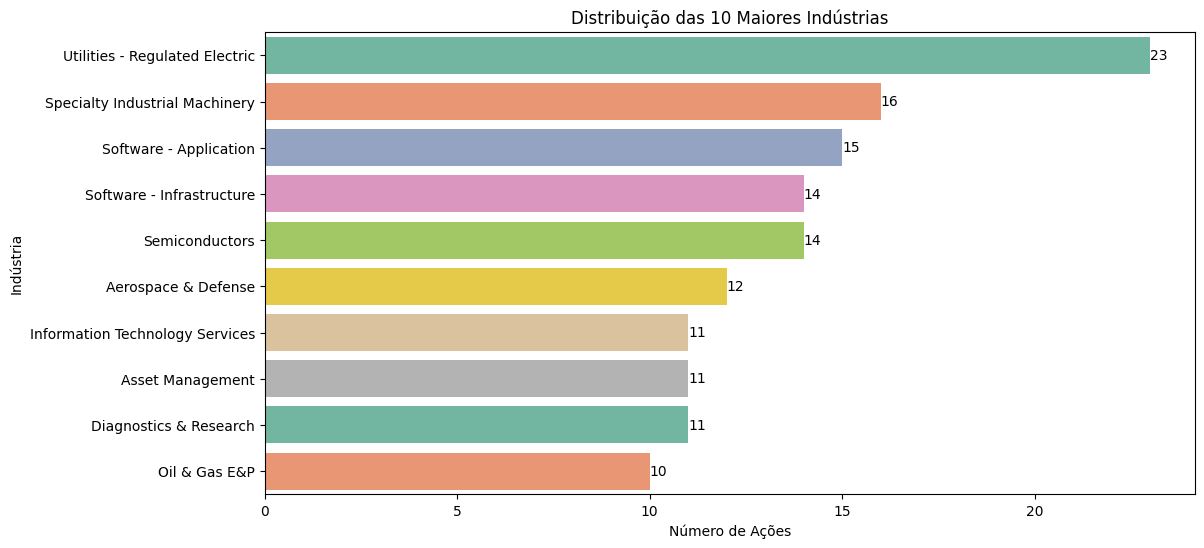

In [110]:
print(f'Número de Indústrias Distintas: {df_companies['industry'].nunique()}')

#  EXIBIR TABELA
distribution_industry = df_companies['industry'].value_counts().reset_index()
distribution_industry.columns = ['Indústria', 'Número de Ações']
distribution_industry = distribution_industry.sort_values(by='Número de Ações', ascending=False)

display(distribution_industry)

# EXIBIR AS 10 MAIORES
top_industries = distribution_industry.nlargest(10, 'Número de Ações')
# print(top_industries)

plt.figure(figsize=(12, 6))
axes = sns.barplot(y='Indústria', x='Número de Ações', data=top_industries, palette='Set2', hue='Indústria', legend=False)

for i in axes.patches:
    axes.annotate(f'{int(i.get_width())}', (i.get_width(), i.get_y() + i.get_height() / 2.), ha='left', va='center')

plt.title('Distribuição das 10 Maiores Indústrias')
plt.xlabel('Número de Ações')
plt.ylabel('Indústria')
plt.show()

* **Principal Insight:** O setor de tecnologia lidera em termos de número de ações (ou empresas), o que condiz com sua influência crescente no mercado. Dentro das indústrias, *Utilities - Regulated Electric* se destaca, mostrando a importância do setor de serviços públicos, seguido por maquinário industrial e software.

### 3. Distribuição do Peso no S&P 500 por Setor

sector
Technology                0.302690
Communication Services    0.130321
Financial Services        0.126208
Healthcare                0.110685
Consumer Cyclical         0.101279
Industrials               0.070593
Consumer Defensive        0.061803
Energy                    0.031474
Utilities                 0.024335
Real Estate               0.022423
Basic Materials           0.018188
Name: weight, dtype: float64


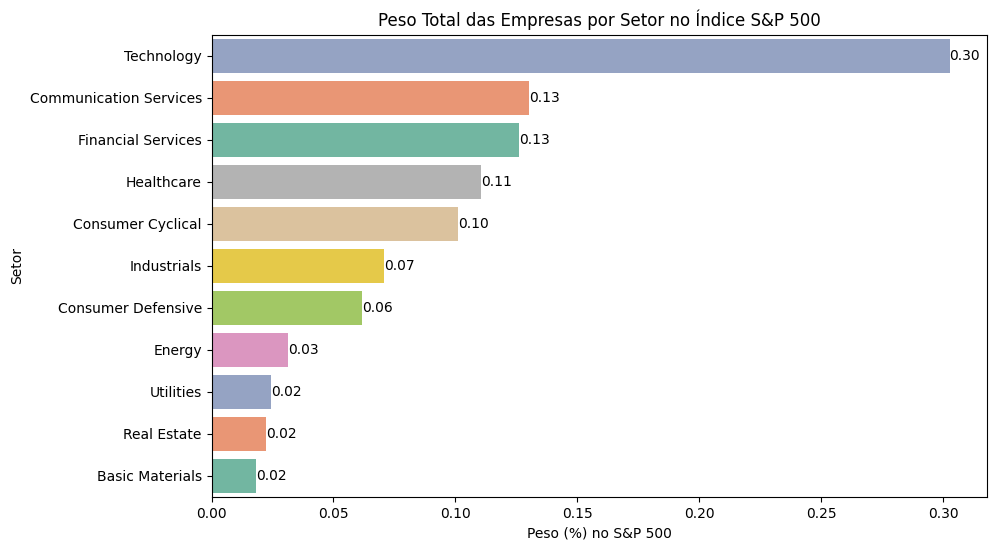

In [111]:
weight_by_sector = df_companies.groupby('sector')['weight'].sum().sort_values(ascending=False)
print(weight_by_sector)

plt.figure(figsize=(10, 6))
axes = sns.barplot(x=weight_by_sector.values, y=weight_by_sector.index, palette='Set2', hue=weight_by_sector, legend=False)

for i in axes.patches:
    axes.annotate(f'{i.get_width():.2f}', (i.get_width(), i.get_y() + i.get_height() / 2.), ha='left', va='center')

plt.title('Peso Total das Empresas por Setor no Índice S&P 500')
plt.xlabel('Peso (%) no S&P 500')
plt.ylabel('Setor')
plt.show()


* **Principal Insight:** O setor de tecnologia não só tem o maior número de empresas, mas também carrega o maior peso no S&P 500, sendo responsável por mais de 30% do índice. Isso reflete a dominância de gigantes como Apple, Microsoft e NVIDIA, que possuem grande influência no desempenho do mercado.

### 4. Empresas com Maior Valor de Mercado

  symbol      marketcap                    shortname
0   AAPL  3469575716864                   Apple Inc.
1   MSFT  3235379150848        Microsoft Corporation
2   NVDA  2845480058880           NVIDIA Corporation
3  GOOGL  2019943776256                Alphabet Inc.
4   GOOG  2019326164992                Alphabet Inc.
5   AMZN  2010956955648             Amazon.com, Inc.
6   META  1420114395136         Meta Platforms, Inc.
7  BRK-B   982609035264  Berkshire Hathaway Inc. New
8    LLY   829733535744        Eli Lilly and Company
9   AVGO   799136284672                Broadcom Inc.


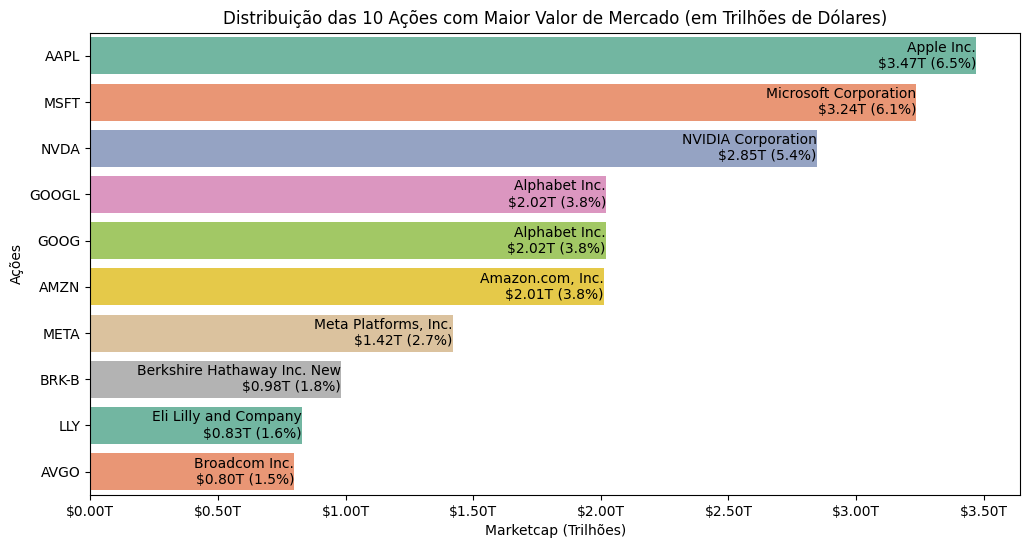

In [112]:
top_marketcap = df_companies.nlargest(10, 'marketcap')
top_marketcap_display = top_marketcap[['symbol', 'marketcap', 'shortname']]  # Incluindo shortname para uso posterior
print(top_marketcap_display)

total_marketcap_all = df_companies['marketcap'].sum()
top_marketcap['marketcap_trilhoes'] = top_marketcap['marketcap'] / 1_000_000_000_000
top_marketcap['percentage'] = (top_marketcap['marketcap'] / total_marketcap_all) * 100

plt.figure(figsize=(12, 6))
axes = sns.barplot(y='symbol', x='marketcap_trilhoes', data=top_marketcap, palette='Set2', hue='symbol', legend=False)

for i, bar in enumerate(axes.patches):
    width = bar.get_width()
    percentage = top_marketcap['percentage'].iloc[i]  # Pega a porcentagem pela posição correta
    shortname = top_marketcap['shortname'].iloc[i]  # Pega o shortname pela posição correta
    axes.annotate(f'{shortname}\n${width:,.2f}T ({percentage:.1f}%)', 
                  (width, bar.get_y() + bar.get_height() / 2.), 
                  ha='right', va='center')

axes.xaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.2f}T'))

plt.title('Distribuição das 10 Ações com Maior Valor de Mercado (em Trilhões de Dólares)')
plt.xlabel('Marketcap (Trilhões)')
plt.ylabel('Ações')
plt.show()

* **Principal Insight:** As empresas de tecnologia dominam a lista das maiores em valor de mercado, com Apple, Microsoft e NVIDIA no topo, seguidas de gigantes como Alphabet, Amazon e Meta. Isso reforça a enorme capitalização de mercado do setor tecnológico no cenário global.

### 5. Distribuição Geográfica:

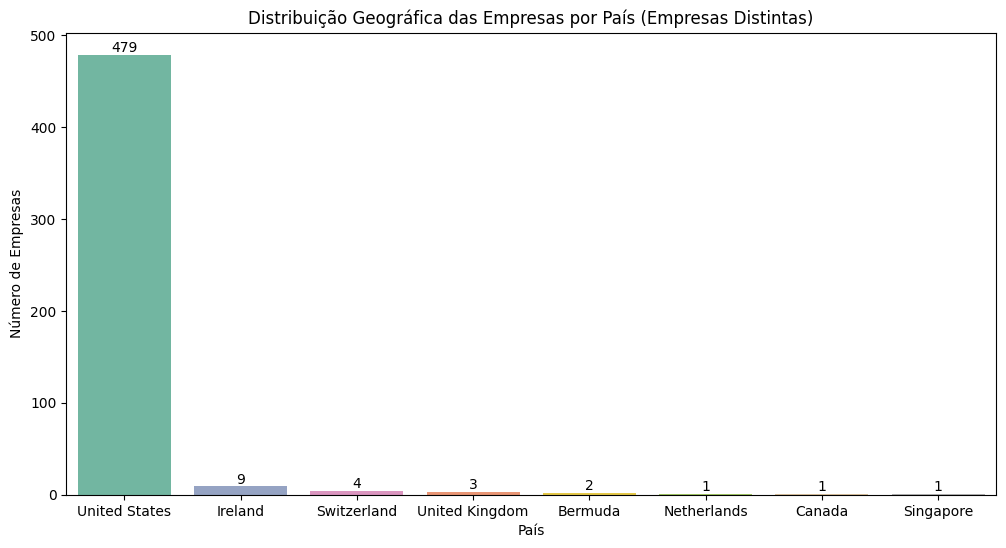

In [113]:
df_companies_unique = df_companies.drop_duplicates(subset=['shortname'])

country_counts = df_companies_unique['country'].value_counts()

plt.figure(figsize=(12, 6))

axes = sns.countplot(x='country', data=df_companies_unique, order=country_counts.index, palette='Set2', hue='country', legend=False)

plt.title('Distribuição Geográfica das Empresas por País (Empresas Distintas)')
plt.xlabel('País')
plt.ylabel('Número de Empresas')

for i in axes.patches:
    axes.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom')

plt.show()

* **Principal Insight:** O mercado de capitais analisado é amplamente dominado por empresas americanas, refletindo a forte posição dos EUA no mercado global. Algumas empresas multinacionais fora dos EUA, especialmente na Europa, também aparecem, mas em menor quantidade.

### Principais Conclusões Gerais:
* NYSE e NASDAQ abrigam quase todas as empresas, sublinhando a centralização das maiores corporações nessas bolsas.

* Empresas de tecnologia são líderes tanto em número quanto em peso no S&P 500, com grandes empresas como Apple, Microsoft e NVIDIA dominando.

* A maioria das empresas está sediada nos EUA, refletindo sua posição como o centro financeiro mundial.

* Embora a tecnologia tenha o maior peso, setores como healthcare, serviços financeiros e comunicação ainda possuem um impacto significativo no mercado.

* Indústrias como "Regulated Electric Utilities" e "Specialty Industrial Machinery" são as mais representadas, além das gigantes tecnológicas.

## Análise Exploratória de Dados (STOCKS)

In [114]:
df_stocks = pd.read_csv('database/stocks_2023-2024.csv')

df_stocks.head()

,date,symbol,adj_close,close,high,low,open,volume,year,month
0,2023-01-03,MMM,93.823418,102.399666,102.541809,100.643814,101.605354,3124909.0,2023,1
1,2023-01-04,MMM,95.876541,104.640465,104.757523,102.600334,103.135452,3312561.0,2023,1
2,2023-01-05,MMM,94.198799,102.809364,104.155518,102.391304,103.854515,3117494.0,2023,1
3,2023-01-06,MMM,97.079315,105.953178,106.295990,103.469902,104.230766,2890732.0,2023,1
4,2023-01-09,MMM,97.132927,106.011703,108.244148,105.443146,106.187294,3434075.0,2023,1


In [115]:
df_stocks.isnull().sum()
# df.duplicated().sum()

date            0
symbol          0
adj_close    1273
close        1273
high         1273
low          1273
open         1273
volume       1273
year            0
month           0
dtype: int64

In [116]:
missing_data = df_stocks[df_stocks.isnull().any(axis=1)]
print(missing_data)

              date symbol  adj_close  close  high  low  open  volume  year  \
88198   2023-01-03    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
88199   2023-01-04    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
88200   2023-01-05    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
88201   2023-01-06    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
88202   2023-01-09    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
...            ...    ...        ...    ...   ...  ...   ...     ...   ...   
196226  2023-09-27   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
196227  2023-09-28   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
196228  2023-09-29   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
196229  2023-10-02   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
196230  2023-10-03   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   

        month  
88198       1  
88199       1  
88200       1  

In [117]:
df_stocks.describe()

,adj_close,close,high,low,open,volume,year,month
count,208981.000000,208981.000000,208981.000000,208981.000000,208981.000000,2.089810e+05,210254.000000,210254.000000
mean,182.875743,184.841635,186.750290,182.831787,184.767765,5.804418e+06,2023.401914,5.734450
std,378.647714,379.110524,382.988531,375.080213,378.829501,2.408473e+07,0.490286,3.174941
min,6.320000,6.320000,6.450000,6.090000,6.400000,0.000000e+00,2023.000000,1.000000
25%,58.459488,59.970001,60.560001,59.349998,59.959999,1.005700e+06,2023.000000,3.000000
50%,107.336540,109.480003,110.699997,108.239998,109.449997,2.024300e+06,2023.000000,6.000000
75%,203.661484,205.880005,208.000000,203.660004,205.860001,4.545100e+06,2024.000000,8.000000
max,9321.269531,9321.269531,9360.000000,9122.309570,9325.000000,1.543911e+09,2024.000000,12.000000
